# COURSE: A deep understanding of deep learning
## SECTION: FFNs
### LECTURE: FFN to classify digits
#### TEACHER: Mike X Cohen, sincxpress.com
##### COURSE URL: udemy.com/course/deeplearning_x/?couponCode=202401
##### Modified from original code

In [1]:
# import libraries
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader,TensorDataset
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

# Import and process the data

In [2]:
# import dataset
data = np.loadtxt('mnist_train_small.csv',delimiter=',')

# extract labels (number IDs) and remove from data
labels = data[:,0]
data   = data[:,1:]

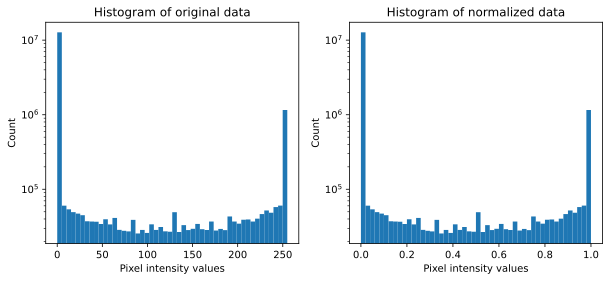

In [3]:
# normalize the data to a range of [0, 1]
# min-max scaling for images
dataNorm = data / np.max(data)

fig,ax = plt.subplots(1,2,figsize=(10,4))
ax[0].hist(data.flatten(),50)
ax[0].set_xlabel('Pixel intensity values')
ax[0].set_ylabel('Count')
ax[0].set_title('Histogram of original data')
ax[0].set_yscale('log') #log-scale for visualization purposes

ax[1].hist(dataNorm.flatten(),50)
ax[1].set_xlabel('Pixel intensity values')
ax[1].set_ylabel('Count')
ax[1].set_title('Histogram of normalized data')
ax[1].set_yscale('log')

plt.show()

# Create train/test groups using DataLoader

In [4]:
# Step 1: convert to tensor
dataT   = torch.tensor( dataNorm ).float()
labelsT = torch.tensor( labels ).long() # long = int64

# Step 2: use scikitlearn to split the data (90%-10% split)
train_data,test_data, train_labels,test_labels = train_test_split(dataT, labelsT, test_size=.1)


# Step 3: convert into PyTorch Datasets
train_data = TensorDataset(train_data,train_labels)
test_data  = TensorDataset(test_data,test_labels)

# Step 4: translate into dataloader objects
batchsize    = 32
train_loader = DataLoader(train_data,batch_size=batchsize,shuffle=True,drop_last=True)
test_loader  = DataLoader(test_data,batch_size=test_data.tensors[0].shape[0])

In [15]:
# check all variables in workspace
%whos

Variable            Type             Data/Info
----------------------------------------------
DataLoader          type             <class 'torch.utils.data.dataloader.DataLoader'>
F                   module           <module 'torch.nn.functio<...>/torch/nn/functional.py'>
TensorDataset       type             <class 'torch.utils.data.dataset.TensorDataset'>
ax                  ndarray          2: 2 elems, type `object`, 16 bytes
batchsize           int              32
data                ndarray          20000x784: 15680000 elems, type `float64`, 125440000 bytes (119.62890625 Mb)
dataNorm            ndarray          20000x784: 15680000 elems, type `float64`, 125440000 bytes (119.62890625 Mb)
dataT               Tensor           tensor([[0., 0., 0.,  ...<...>, 0.,  ..., 0., 0., 0.]])
fig                 Figure           Figure(1000x400)
labels              ndarray          20000: 20000 elems, type `float64`, 160000 bytes (156.25 kb)
labelsT             Tensor           tensor([6, 5, 7,  

# Create the DL model

In [5]:
# create a class for the model
def createTheMNISTNet():

  class mnistNet(nn.Module):
    def __init__(self):
      super().__init__()

      ### input layer (784 vectorized image data as x)
      self.input = nn.Linear(784,64)
      
      ### hidden layer
      self.fc1 = nn.Linear(64,32)
      self.fc2 = nn.Linear(32,32)

      ### output layer
      self.output = nn.Linear(32,10)

    # forward pass
    def forward(self,x):
      x = F.relu( self.input(x) )
      x = F.relu( self.fc1(x) )
      x = F.relu( self.fc2(x) )
      return torch.log_softmax( self.output(x),axis=1 )
      # NEW HERE: log-softmax the output, because I'm using NLLLoss instead of CrossEntropyLoss
  
  # create the model instance
  net = mnistNet()
  
  # loss function
  lossfun = nn.NLLLoss() #NLL is basically CCE

  # optimizer
  optimizer = torch.optim.SGD(net.parameters(),lr=.01)

  return net,lossfun,optimizer

In [13]:
# test the model with one batch
net,lossfun,optimizer = createTheMNISTNet()

X,y = next(iter(train_loader))
yHat = net(X)

# values are log-probability of each number (0-9)
# it should be roughly 10% each bc the model is not trained yet
print(torch.exp(yHat.detach()))

# now let's compute the loss
loss = lossfun(yHat,y)
print(' ')
print('Loss:')
print(loss.item())

tensor([[0.0885, 0.0996, 0.1005, 0.1076, 0.0812, 0.0944, 0.1089, 0.1221, 0.0874,
         0.1097],
        [0.0881, 0.1004, 0.0995, 0.1071, 0.0804, 0.0954, 0.1089, 0.1230, 0.0878,
         0.1094],
        [0.0883, 0.1006, 0.1001, 0.1081, 0.0815, 0.0947, 0.1088, 0.1204, 0.0874,
         0.1099],
        [0.0878, 0.1014, 0.1000, 0.1077, 0.0815, 0.0950, 0.1092, 0.1202, 0.0881,
         0.1091],
        [0.0873, 0.1001, 0.1009, 0.1078, 0.0815, 0.0937, 0.1093, 0.1198, 0.0883,
         0.1111],
        [0.0880, 0.1004, 0.1001, 0.1080, 0.0812, 0.0950, 0.1090, 0.1212, 0.0876,
         0.1096],
        [0.0876, 0.0991, 0.1015, 0.1083, 0.0810, 0.0943, 0.1084, 0.1225, 0.0885,
         0.1086],
        [0.0882, 0.0994, 0.1008, 0.1081, 0.0813, 0.0946, 0.1087, 0.1215, 0.0876,
         0.1097],
        [0.0883, 0.1000, 0.1006, 0.1078, 0.0813, 0.0946, 0.1086, 0.1212, 0.0877,
         0.1099],
        [0.0882, 0.1001, 0.1004, 0.1073, 0.0807, 0.0952, 0.1084, 0.1229, 0.0878,
         0.1091],
        [0

# Create a function that trains the model

In [14]:
# a function that trains the model

def function2trainTheModel():

  # number of epochs
  numepochs = 60
  
  # create a new model
  net,lossfun,optimizer = createTheMNISTNet()

  # initialize losses
  losses    = torch.zeros(numepochs)
  trainAcc  = []
  testAcc   = []


  # loop over epochs
  for epochi in range(numepochs):

    # loop over training data batches
    batchAcc  = []
    batchLoss = []
    for X,y in train_loader:

      # forward pass and loss
      yHat = net(X)
      loss = lossfun(yHat,y)

      # backprop
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      # loss from this batch
      batchLoss.append(loss.item())

      # compute accuracy
      matches = torch.argmax(yHat,axis=1) == y     # booleans (false/true)
      matchesNumeric = matches.float()             # convert to numbers (0/1)
      accuracyPct = 100*torch.mean(matchesNumeric) # average and x100
      batchAcc.append( accuracyPct )               # add to list of accuracies
    # end of batch loop...

    # now that we've trained through the batches, get their average training accuracy
    trainAcc.append( np.mean(batchAcc) )

    # and get average losses across the batches
    losses[epochi] = np.mean(batchLoss)

    # test accuracy
    X,y = next(iter(test_loader)) # extract X,y from test dataloader
    yHat = net(X)
      
    # compare the following really long line of code to the training accuracy lines
    testAcc.append( 100*torch.mean((torch.argmax(yHat,axis=1)==y).float()) )

  # end epochs

  # function output
  return trainAcc,testAcc,losses,net


# Run the model and show the results!

In [15]:
trainAcc,testAcc,losses,net = function2trainTheModel()


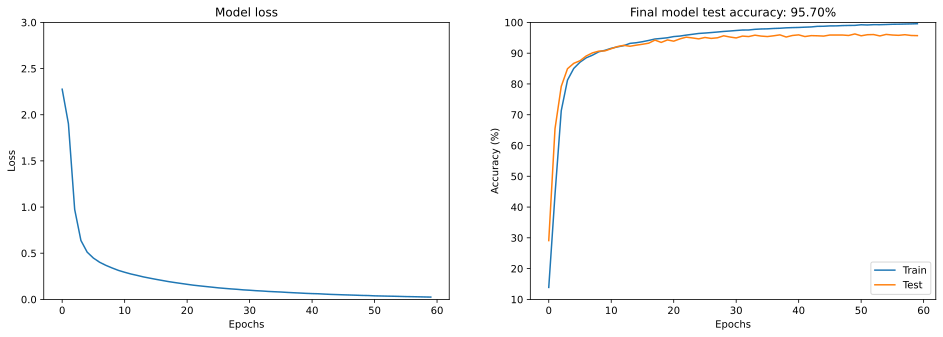

In [16]:
fig,ax = plt.subplots(1,2,figsize=(16,5))

ax[0].plot(losses)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].set_ylim([0,3])
ax[0].set_title('Model loss')

ax[1].plot(trainAcc,label='Train')
ax[1].plot(testAcc,label='Test')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy (%)')
ax[1].set_ylim([10,100])
ax[1].set_title(f'Final model test accuracy: {testAcc[-1]:.2f}%')
ax[1].legend()

plt.show()

# Inspect the results in more detail

In [20]:
# run the model through for the test data
# we expect this to be more biased in each prediction vector
X,y = next(iter(test_loader))
predictions = net(X).detach()

# u can see numbers are very small, so that illustrates log-probabilities work better
torch.exp(predictions)

tensor([[1.1929e-09, 6.1737e-07, 5.5150e-09,  ..., 2.6801e-06, 4.9229e-06,
         5.3176e-04],
        [1.8323e-10, 2.8511e-16, 2.0328e-17,  ..., 2.7981e-17, 1.0254e-07,
         4.2002e-13],
        [8.9048e-01, 7.6757e-13, 1.0928e-01,  ..., 5.9840e-08, 2.8334e-07,
         1.0277e-11],
        ...,
        [2.0025e-07, 1.4764e-13, 9.5975e-09,  ..., 1.6570e-16, 9.8986e-12,
         2.9768e-16],
        [5.6038e-08, 1.7973e-08, 4.7169e-09,  ..., 8.5478e-16, 9.8762e-01,
         6.1060e-11],
        [5.7910e-10, 7.2677e-05, 4.4889e-04,  ..., 1.8846e-08, 2.0249e-03,
         4.8062e-10]])

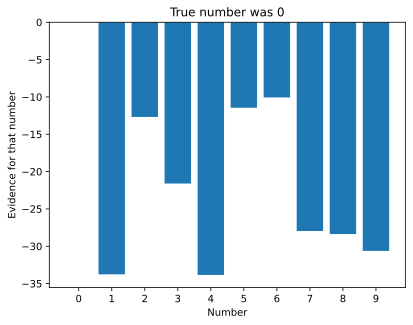

In [21]:
# Evidence for all numbers from one sample
# The true number bar is ~0 bc log(1) = 0, where 1 is probability
sample2show = 120

plt.bar(range(10),predictions[sample2show]) # try adding exp!
plt.xticks(range(10))
plt.xlabel('Number')
plt.ylabel('Evidence for that number')
plt.title('True number was %s' %y[sample2show].item())
plt.show()

[  45  134  183  202  222  244  264  274  298  319  326  348  398  409
  417  418  431  459  482  530  609  621  640  653  741  766  824  890
  896  912  914  931  950  951  987  998 1039 1051 1084 1096 1152 1159
 1160 1213 1237 1240 1250 1277 1329 1333 1350 1358 1370 1377 1396 1404
 1428 1516 1543 1552 1560 1562 1573 1620 1635 1651 1652 1654 1658 1683
 1684 1685 1706 1717 1732 1744 1757 1785 1794 1806 1837 1855 1873 1894
 1940 1960]


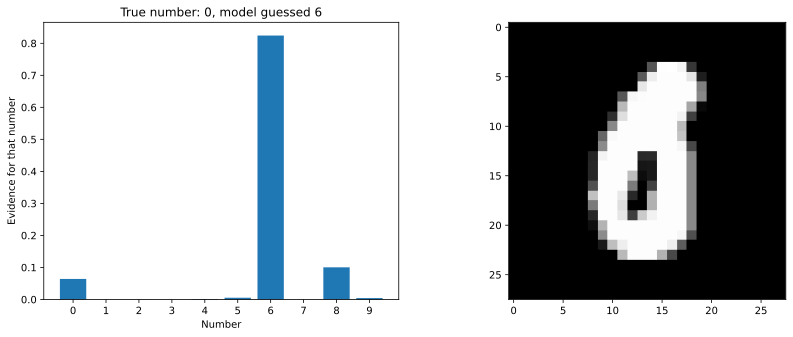

In [24]:
# find the indices where errors occur
errors = np.where( torch.max(predictions,axis=1)[1] != y )[0]
print(errors)

# Evidence for all numbers from one sample
sample2show = 10 #tweak this

fig,ax = plt.subplots(1,2,figsize=(14,5))

ax[0].bar(range(10),np.exp(predictions[errors[sample2show]]))
ax[0].set_xticks(range(10))
ax[0].set_xlabel('Number')
ax[0].set_ylabel('Evidence for that number')
ax[0].set_title('True number: %s, model guessed %s' 
                %( y[errors[sample2show]].item(), torch.argmax(predictions[errors[sample2show]]).item() ))

ax[1].imshow( np.reshape(X[errors[sample2show],:],(28,28)) ,cmap='gray')

plt.show()

# we can see how model gets confused

# Additional explorations

In [ ]:
# 1) Average together the correct 7's and the error 7's, and make images of them (that is, one image
#    of all correct 7's and one image of all incorrectly labeled 7's). How do they look?
# 
# 2) Repeat #1 for all numbers to produce a 2x10 matrix of images with corrects on top
#    and errors on the bottom.
# 
# 3) Identify "almost errors," which we can define as correct categorizations that had a probability of
#    e.g., >.1 for any other number. Make images of some of these numbers. Can you understand why the model
#    was confused?
# 
# 4) I didn't use .train(), .eval(), or no_grad() here. Is that a problem? Can you add those in without checking
#    other notebooks?
# 